In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
from matplotlib import pyplot as plt

%matplotlib inline

In [69]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) * np.array([1, 2, 3]).reshape((3, 1))

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

In [86]:
reload(trig_poly)
reload(dual_certificates)
reload(test_data)

N = 5
fc = 30
min_separation = 0.5 / fc

gammas = [0.247, 0.339, 0.414]
kernel = trig_poly.TrigPoly.dirichlet(fc)
gamma_kernel = trig_poly.TrigPoly.multi_dirichlet(fc, gammas)

support = test_data.jittered_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_1d(N)

# interpolator_1 = dual_certificates.interpolate(support, sign_pattern, kernel)
interpolator_2 = dual_certificates.interpolate_with_derivative(support, sign_pattern, kernel)
interpolator_3 = dual_certificates.interpolate_with_derivative(support, sign_pattern, gamma_kernel)

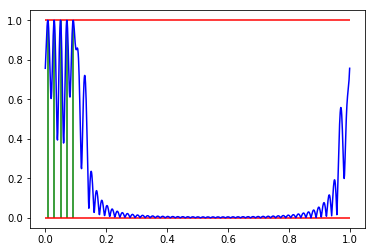

In [87]:
plt_util.plot_trig_poly_magnitude(interpolator_3, points=1000)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

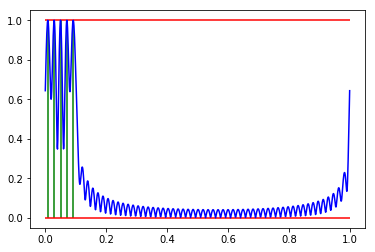

In [88]:
plt_util.plot_trig_poly_magnitude(interpolator_2, points=1000)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [89]:
reload(dual_certificates)
print dual_certificates.validate(support, sign_pattern, interpolator_3)

{'status': True, 'values_achieved': True, 'bound_achieved': True}


# Phase Transition

In [90]:
import phase_transition
from matplotlib import pyplot as plt

In [91]:
reload(phase_transition)
reload(dual_certificates)

fc = 30

probs = phase_transition.grid_probabilities(
    test_data.uniform_supports,
    test_data.uniform_sign_pattern_1d,
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_with_derivative,
    range(2, 25),
    np.linspace(0.0, 1.0, 25) / float(fc),
    num_experiments=10,
    verbose=True)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17


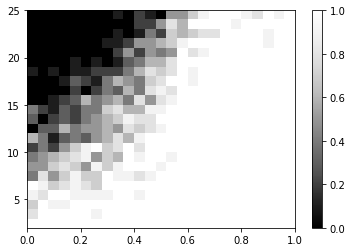

In [93]:
plt.imshow(
    np.flip(probs, axis=0), 
    cmap='Greys_r', 
    vmin=0.0, 
    vmax=1.0,
    extent=[0.0, 1.0, 2, 25], 
    aspect='auto')
plt.colorbar()